## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

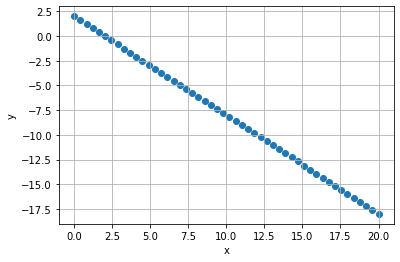

In [4]:
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [24]:
def Adagrad_SV(x,y,alpha,epsilon,iterations):
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        h = theta_0 + theta_1 * X 
        print(f"h(x):{h} \n")

        error = h - y
        MSE = error @ error /(2*len(error))
        print(f"Error Vector: {error} \n")
        print(f"j = {MSE} \n")

        d_theta_0 = np.sum(error)/len(error)
        d_theta_1 = error @ X / len(error)
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}")

        GV = np.array([[d_theta_0],[d_theta_1]])
        GVN = np.linalg.norm(GV,2)
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")
        
        #Vt
        v_0 = v_0 + d_theta_0**2
        v_1 = v_1 + d_theta_1**2

        theta_0 = theta_0 - (alpha/(np.sqrt(v_0)+epsilon))*d_theta_0
        theta_1 = theta_1 - (alpha/(np.sqrt(v_1)+epsilon))*d_theta_1
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        loss.append(MSE)
        output.append(h)
        th_0.append(theta_0)
        th_1.append(theta_1)

                
        if i > 0 and abs(MSE - loss[i-1]) < 0.001:
            break
        if GVN < 0.001:
            break

    epochs = np.arange(i+1)
        
    return th_0,th_1,loss,output,th_0[-1], th_1[-1],epochs

def plot_line(x, y, xlabel, ylabel, style, *title):
    plt.plot(x, y, style)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()
def plot_lines(x, y, y_hat, xlabel, ylabel, style):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    for i in range(len(y_hat)):
        plt.plot(x, y_hat[i], style)
    plt.show()
def plot_best_fit(x, y, y_hat, xlabel, ylabel, style):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y_hat[-1], style)
    plt.grid()
    plt.show()

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [25]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adagrad_SV(X, y, 0.05, 1e-08, 500)

Streaming output truncated to the last 5000 lines.
theta_1_new : -0.6989135109498394 

****************** Iteration 124 ********************
h(x):[ -0.63414464  -0.91941546  -1.20468628  -1.48995711  -1.77522793
  -2.06049875  -2.34576957  -2.63104039  -2.91631121  -3.20158203
  -3.48685285  -3.77212367  -4.05739449  -4.34266531  -4.62793613
  -4.91320696  -5.19847778  -5.4837486   -5.76901942  -6.05429024
  -6.33956106  -6.62483188  -6.9101027   -7.19537352  -7.48064434
  -7.76591516  -8.05118598  -8.3364568   -8.62172763  -8.90699845
  -9.19226927  -9.47754009  -9.76281091 -10.04808173 -10.33335255
 -10.61862337 -10.90389419 -11.18916501 -11.47443583 -11.75970665
 -12.04497748 -12.3302483  -12.61551912 -12.90078994 -13.18606076
 -13.47133158 -13.7566024  -14.04187322 -14.32714404 -14.61241486] 

Error Vector: [-2.63414464 -2.5112522  -2.38835975 -2.26546731 -2.14257487 -2.01968242
 -1.89678998 -1.77389753 -1.65100509 -1.52811264 -1.4052202  -1.28232775
 -1.15943531 -1.03654286 -0.913

In [26]:
from sklearn.metrics import r2_score
r2_score(y, output[-1])

0.9484638125790851

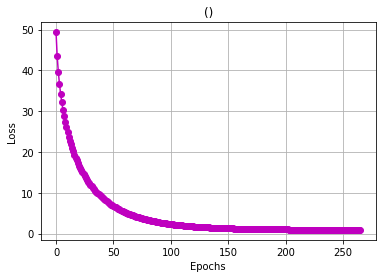

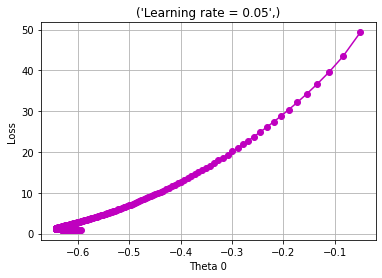

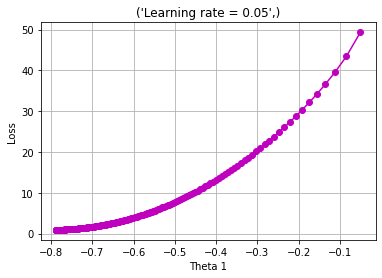

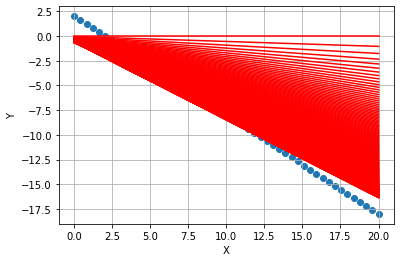

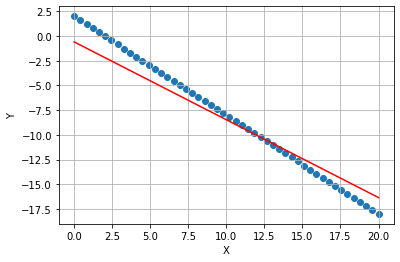

In [27]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.05')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.05')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [38]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adagrad_SV(X, y, 0.005, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.

Gradient Vector Norm: 34.51655766308727 

theta_0_new : -0.5353475863587709 

theta_1_new : -0.5559445738480215 

****************** Iteration 4861 ********************
h(x):[ -0.53534759  -0.76226374  -0.98917989  -1.21609604  -1.4430122
  -1.66992835  -1.8968445   -2.12376065  -2.35067681  -2.57759296
  -2.80450911  -3.03142526  -3.25834142  -3.48525757  -3.71217372
  -3.93908988  -4.16600603  -4.39292218  -4.61983833  -4.84675449
  -5.07367064  -5.30058679  -5.52750294  -5.7544191   -5.98133525
  -6.2082514   -6.43516755  -6.66208371  -6.88899986  -7.11591601
  -7.34283216  -7.56974832  -7.79666447  -8.02358062  -8.25049677
  -8.47741293  -8.70432908  -8.93124523  -9.15816138  -9.38507754
  -9.61199369  -9.83890984 -10.065826   -10.29274215 -10.5196583
 -10.74657445 -10.97349061 -11.20040676 -11.42732291 -11.65423906] 

Error Vector: [-2.53534759e+00 -2.35410047e+00 -2.17285336e+00 -1.99160625e+00
 -1.81035914e+00 -1.62911202e+00 -

In [33]:
r2_score(y, output[-1])

0.7095974929894115

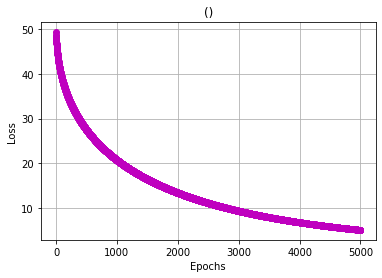

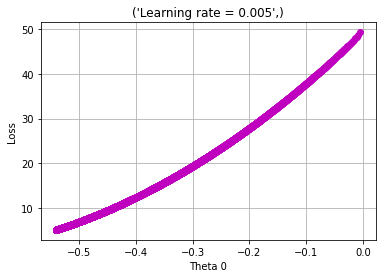

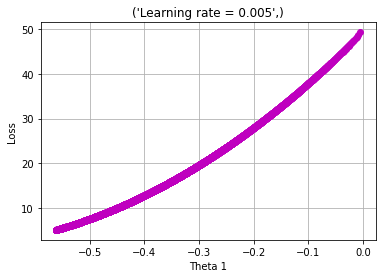

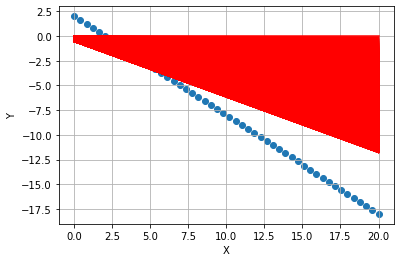

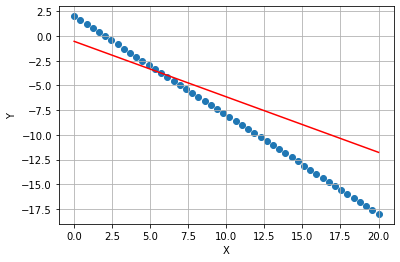

In [39]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [34]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adagrad_SV(X, y, 0.0005, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
theta_1_new : -0.05304561533844361 

****************** Iteration 2960 ********************
h(x):[-0.05298641 -0.07463769 -0.09628896 -0.11794023 -0.1395915  -0.16124277
 -0.18289404 -0.20454532 -0.22619659 -0.24784786 -0.26949913 -0.2911504
 -0.31280167 -0.33445294 -0.35610422 -0.37775549 -0.39940676 -0.42105803
 -0.4427093  -0.46436057 -0.48601185 -0.50766312 -0.52931439 -0.55096566
 -0.57261693 -0.5942682  -0.61591948 -0.63757075 -0.65922202 -0.68087329
 -0.70252456 -0.72417583 -0.7458271  -0.76747838 -0.78912965 -0.81078092
 -0.83243219 -0.85408346 -0.87573473 -0.89738601 -0.91903728 -0.94068855
 -0.96233982 -0.98399109 -1.00564236 -1.02729363 -1.04894491 -1.07059618
 -1.09224745 -1.11389872] 

Error Vector: [-2.05298641 -1.66647442 -1.27996243 -0.89345043 -0.50693844 -0.12042645
  0.26608555  0.65259754  1.03910954  1.42562153  1.81213352  2.19864552
  2.58515751  2.9716695   3.3581815   3.74469349  4.13120549  4.51771748
  4.9042

In [35]:
r2_score(y, output[-1])

-1.4736441832884104

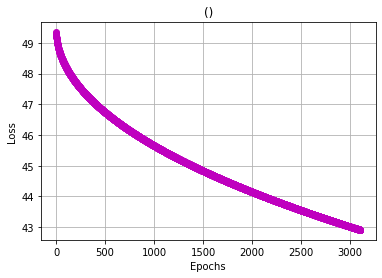

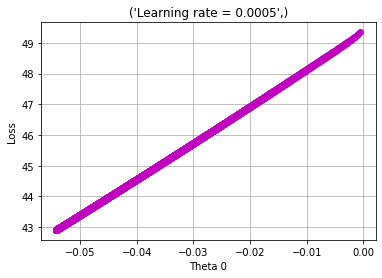

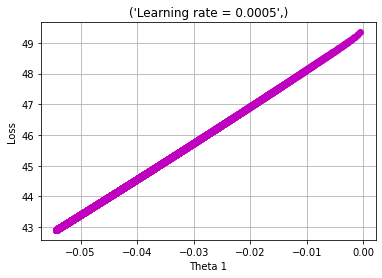

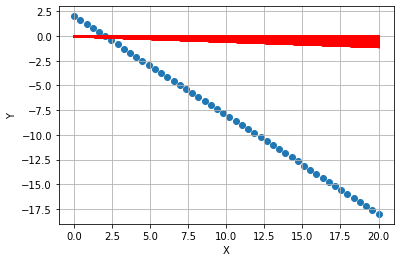

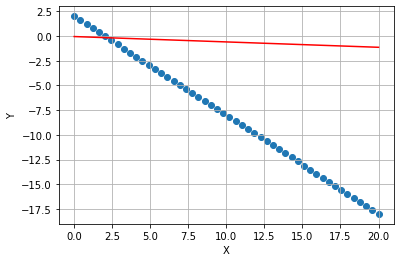

In [37]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.0005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.0005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [40]:
def RMSProp_SV(x,y,alpha,beta,epsilon,iterations):
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        h = theta_0 + theta_1 * X 
        print(f"h(x):{h} \n")

        error = h - y
        MSE = error @ error /(2*len(error))
        print(f"Error Vector: {error} \n")
        print(f"j = {MSE} \n")

        d_theta_0 = np.sum(error)/len(error)
        d_theta_1 = error @ X / len(error)
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}")

        GV = np.array([[d_theta_0],[d_theta_1]])
        GVN = np.linalg.norm(GV,2)
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")
        
        #Vt
        v_0 = beta*v_0 + (1-beta)*(d_theta_0**2)
        v_1 = beta*v_1 + (1-beta)*(d_theta_1**2)

        theta_0 = theta_0 - (alpha/(np.sqrt(v_0)+epsilon))*d_theta_0
        theta_1 = theta_1 - (alpha/(np.sqrt(v_1)+epsilon))*d_theta_1
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        loss.append(MSE)
        output.append(h)
        th_0.append(theta_0)
        th_1.append(theta_1)

                
        if i > 0 and abs(MSE - loss[i-1]) < 0.001:
            break
        if GVN < 0.001:
            break

    epochs = np.arange(i+1)
        
    return th_0,th_1,loss,output,th_0[-1], th_1[-1],epochs

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [41]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = RMSProp_SV(X, y, 0.05,0.9, 1e-08, 500)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.34693877551021 

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042
Gradient Vector:[[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628

In [42]:
r2_score(y,output[-1])

0.9993602095484933

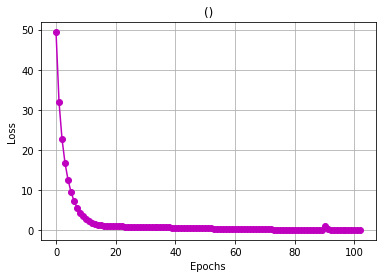

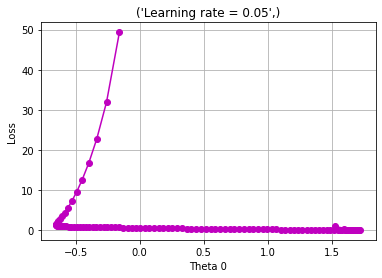

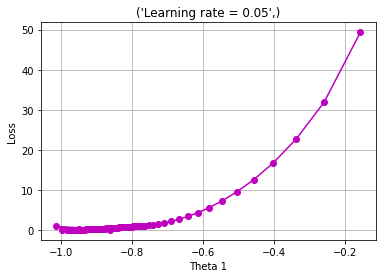

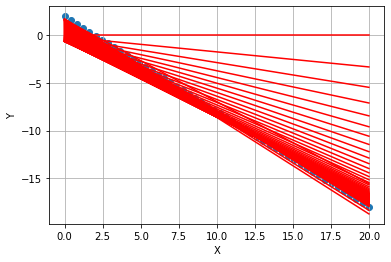

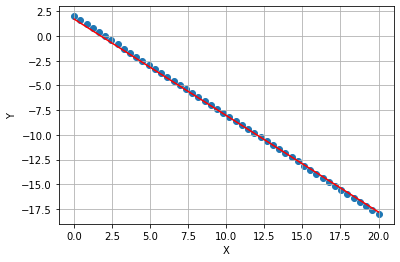

In [44]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.05')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.05')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [45]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = RMSProp_SV(X, y, 0.005,0.9, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
 -12.22799667 -12.59173935 -12.95548204 -13.31922472 -13.6829674
 -14.04671009 -14.41045277 -14.77419546 -15.13793814 -15.50168083
 -15.86542351 -16.2291662  -16.59290888 -16.95665157 -17.32039425] 

Error Vector: [-1.4970027  -1.45258212 -1.40816154 -1.36374096 -1.31932038 -1.2748998
 -1.23047922 -1.18605864 -1.14163806 -1.09721748 -1.0527969  -1.00837632
 -0.96395574 -0.91953516 -0.87511457 -0.83069399 -0.78627341 -0.74185283
 -0.69743225 -0.65301167 -0.60859109 -0.56417051 -0.51974993 -0.47532935
 -0.43090877 -0.38648819 -0.34206761 -0.29764703 -0.25322645 -0.20880586
 -0.16438528 -0.1199647  -0.07554412 -0.03112354  0.01329704  0.05771762
  0.1021382   0.14655878  0.19097936  0.23539994  0.27982052  0.3242411
  0.36866168  0.41308227  0.45750285  0.50192343  0.54634401  0.59076459
  0.63518517  0.67960575] 

j = 0.2889754220975988 

d_theta_0 : -0.40869847755384275
d_theta_1 : -0.31123541704874635
Gradient Vector:[[-0.40869848]
 [-

In [46]:
r2_score(y,output[-1])

0.9948527107478715

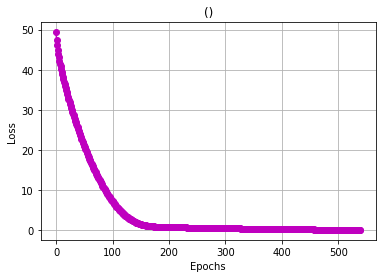

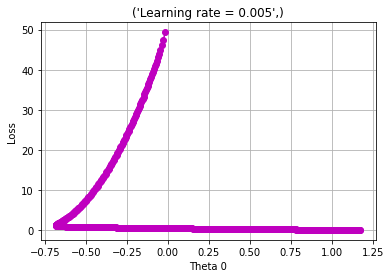

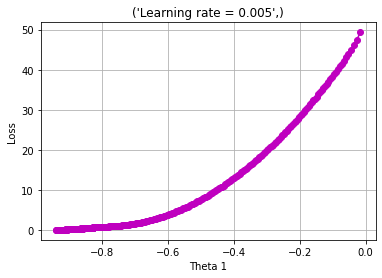

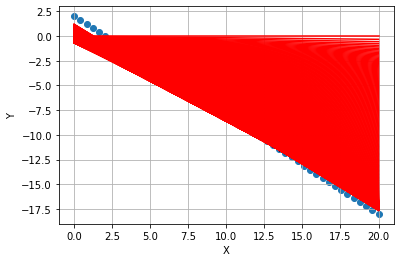

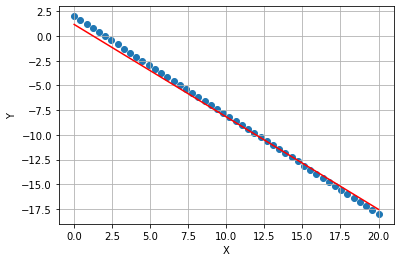

In [47]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [48]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = RMSProp_SV(X, y, 0.0005,0.9, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
Gradient Vector Norm: 9.609649204604844 

theta_0_new : -0.7151640629871724 

theta_1_new : -0.7275523152939707 

****************** Iteration 1468 ********************
h(x):[ -0.71516406  -1.01212419  -1.30908432  -1.60604445  -1.90300458
  -2.19996471  -2.49692484  -2.79388496  -3.09084509  -3.38780522
  -3.68476535  -3.98172548  -4.27868561  -4.57564574  -4.87260586
  -5.16956599  -5.46652612  -5.76348625  -6.06044638  -6.35740651
  -6.65436664  -6.95132677  -7.24828689  -7.54524702  -7.84220715
  -8.13916728  -8.43612741  -8.73308754  -9.03004767  -9.3270078
  -9.62396792  -9.92092805 -10.21788818 -10.51484831 -10.81180844
 -11.10876857 -11.4057287  -11.70268882 -11.99964895 -12.29660908
 -12.59356921 -12.89052934 -13.18748947 -13.4844496  -13.78140973
 -14.07836985 -14.37532998 -14.67229011 -14.96925024 -15.26621037] 

Error Vector: [-2.71516406 -2.60396093 -2.49275779 -2.38155465 -2.27035152 -2.15914838
 -2.04794524 -1.93674211 -

In [49]:
r2_score(y,output[-1])

0.9476184845511563

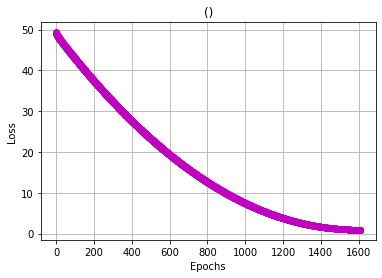

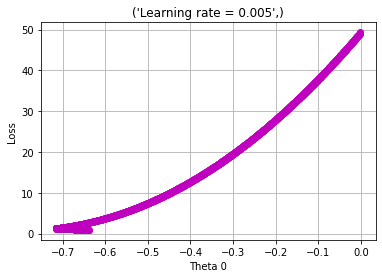

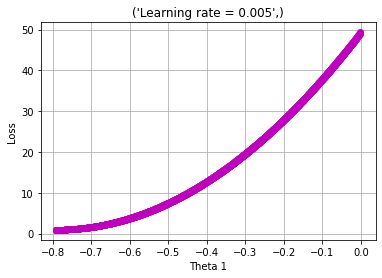

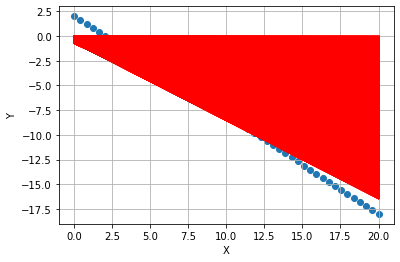

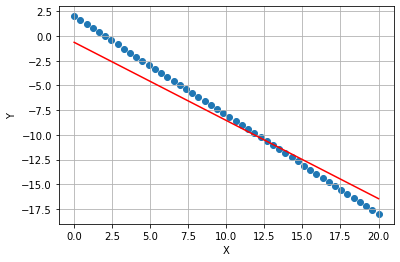

In [50]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [51]:
def Adam_SV(x,y,alpha,beta_1,beta_2,epsilon,iterations):
    theta_0 = 0
    theta_1 = 0
    m_0 = 0
    m_1 = 0
    v_0 = 0
    v_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        h = theta_0 + theta_1 * X 
        print(f"h(x):{h} \n")

        error = h - y
        MSE = error @ error /(2*len(error))
        print(f"Error Vector: {error} \n")
        print(f"j = {MSE} \n")

        d_theta_0 = np.sum(error)/len(error)
        d_theta_1 = error @ X / len(error)
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}")

        GV = np.array([[d_theta_0],[d_theta_1]])
        GVN = np.linalg.norm(GV,2)
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")
        
        #Momentum
        m_0 = beta_1*m_0 + (1-beta_1)*d_theta_0
        m_0_hat = m_0 / (1-beta_1**(i+1))
        print(f"mo=:{m_0}")
        print(f"mo corrected=:{m_0_hat}")

        m_1 = beta_1*m_1 + (1-beta_1)*d_theta_1
        m_1_hat = m_1 / (1-beta_1**(i+1))
        print(f"m1=:{m_0}")
        print(f"m1 corrected=:{m_0_hat}")

        #Vt
        v_0 = beta_2*v_0 + (1-beta_2)*(d_theta_0**2)
        v_0_hat = v_0 / (1-beta_2**(i+1))
        print(f"vo=:{v_0}")
        print(f"vo corrected=:{v_0_hat}")

        v_1 = beta_2*v_1 + (1-beta_2)*(d_theta_1**2)
        v_1_hat = v_1 / (1-beta_2**(i+1))
        print(f"v1=:{v_1}")
        print(f"v1 corrected=:{v_1_hat}")
        
        theta_0 = theta_0 - alpha*m_0_hat/(np.sqrt(v_0_hat)+epsilon)
        theta_1 = theta_1 - alpha*m_1_hat/(np.sqrt(v_1_hat)+epsilon)
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        loss.append(MSE)
        output.append(h)
        th_0.append(theta_0)
        th_1.append(theta_1)

                
        if i > 0 and abs(MSE - loss[i-1]) < 0.001:
            break
        if GVN < 0.001:
            break

    epochs = np.arange(i+1)
        
    return th_0,th_1,loss,output,th_0[-1], th_1[-1],epochs

##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [52]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adam_SV(X, y, 0.05,0.2,0.7, 1e-08, 500)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.34693877551021 

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042
Gradient Vector:[[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628

In [53]:
r2_score(y,output[-1])

0.9989675218213947

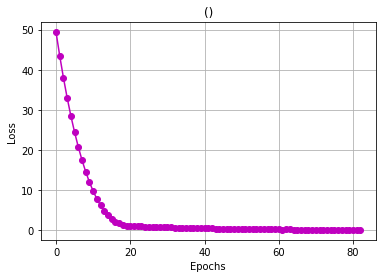

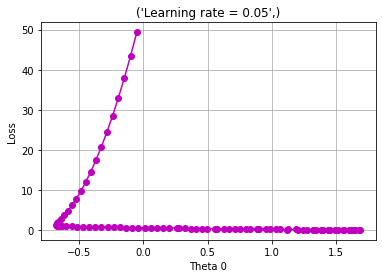

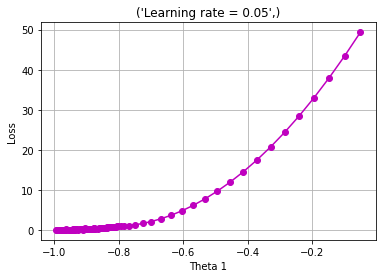

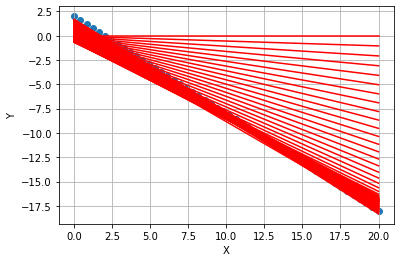

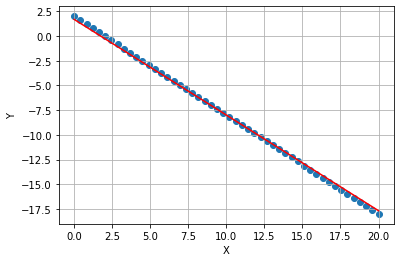

In [55]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.05')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.05')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [56]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adam_SV(X, y, 0.005,0.5,0.8, 1e-08, 500)

Streaming output truncated to the last 5000 lines.
  -6.78283473  -7.14400912  -7.5051835   -7.86635789  -8.22753228
  -8.58870667  -8.94988106  -9.31105545  -9.67222983 -10.03340422
 -10.39457861 -10.755753   -11.11692739 -11.47810177 -11.83927616
 -12.20045055 -12.56162494 -12.92279933 -13.28397372 -13.6451481
 -14.00632249 -14.36749688 -14.72867127 -15.08984566 -15.45102005
 -15.81219443 -16.17336882 -16.53454321 -16.8957176  -17.25689199] 

Error Vector: [-1.55934696 -1.51235809 -1.46536921 -1.41838033 -1.37139145 -1.32440258
 -1.2774137  -1.23042482 -1.18343595 -1.13644707 -1.08945819 -1.04246931
 -0.99548044 -0.94849156 -0.90150268 -0.85451381 -0.80752493 -0.76053605
 -0.71354718 -0.6665583  -0.61956942 -0.57258054 -0.52559167 -0.47860279
 -0.43161391 -0.38462504 -0.33763616 -0.29064728 -0.2436584  -0.19666953
 -0.14968065 -0.10269177 -0.0557029  -0.00871402  0.03827486  0.08526373
  0.13225261  0.17924149  0.22623037  0.27321924  0.32020812  0.367197
  0.41418587  0.46117475  0.

In [57]:
r2_score(y,output[-1])

0.9926267207526386

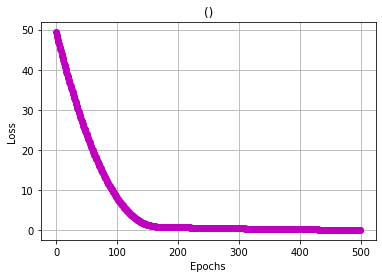

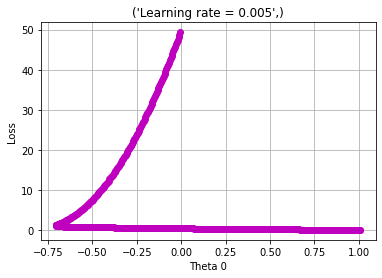

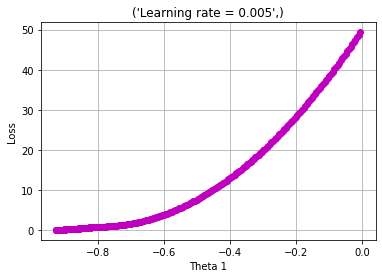

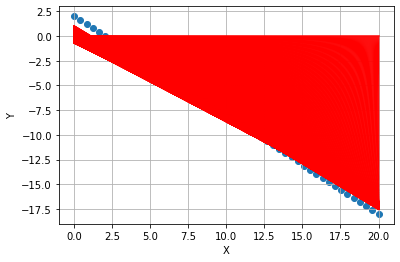

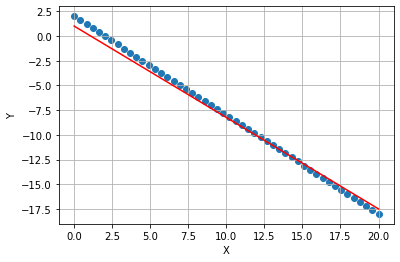

In [58]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [59]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adam_SV(X, y, 0.0005,0.8,0.8, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
 -0.12314131 -0.01475853  0.09362425  0.20200703  0.31038981  0.41877259
  0.52715537  0.63553815  0.74392093  0.85230371  0.96068649  1.06906927
  1.17745205  1.28583484  1.39421762  1.5026004   1.61098318  1.71936596
  1.82774874  1.93613152  2.0445143   2.15289708  2.26127986  2.36966264
  2.47804542  2.5864282 ] 

j = 1.2255154237051875 

d_theta_0 : -0.06894992386392974
d_theta_1 : 8.523037122650457
Gradient Vector:[[-0.06894992]
 [ 8.52303712]] 

Gradient Vector Norm: 8.523316014678715 

mo=:-0.05018637573677127
mo corrected=:-0.05018637573677127
m1=:-0.05018637573677127
m1 corrected=:-0.05018637573677127
vo=:0.0029974641877057897
vo corrected=:0.0029974641877057897
v1=:77.17655589246043
v1 corrected=:77.17655589246043
theta_0_new : -0.7238697210313354 

theta_1_new : -0.7349619027805891 

****************** Iteration 1470 ********************
h(x):[ -0.72386972  -1.02385417  -1.32383862  -1.62382307  -1.92380752
  -2.22379197  -

In [60]:
r2_score(y,output[-1])

0.9467806664066584

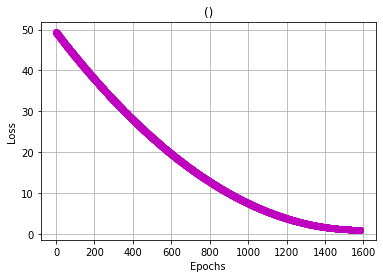

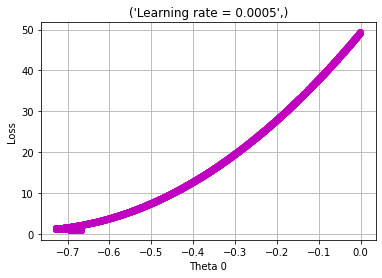

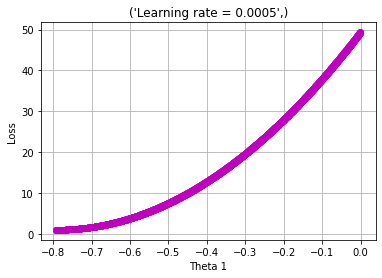

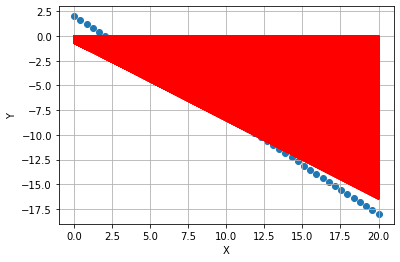

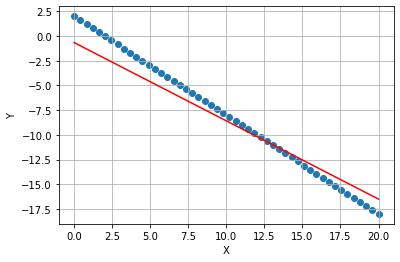

In [61]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.0005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.0005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [62]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adam_SV(X, y, 0.001,0.9,0.99, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
 -0.22698101 -0.12535441 -0.02372782  0.07789877  0.17952536  0.28115195
  0.38277854  0.48440513  0.58603173  0.68765832  0.78928491  0.8909115
  0.99253809  1.09416468  1.19579127  1.29741787  1.39904446  1.50067105
  1.60229764  1.70392423  1.80555082  1.90717741  2.008804    2.1104306
  2.21205719  2.31368378] 

j = 1.0909167902412258 

d_theta_0 : -0.17616770990402084
d_theta_1 : 6.876583167743912
Gradient Vector:[[-0.17616771]
 [ 6.87658317]] 

Gradient Vector Norm: 6.878839373390814 

mo=:-0.13689571868686215
mo corrected=:-0.13689571868686215
m1=:-0.13689571868686215
m1 corrected=:-0.13689571868686215
vo=:0.6367727592307849
vo corrected=:0.6368186595233092
v1=:294.5917577481083
v1 corrected=:294.6129927140516
theta_0_new : -0.6658476520223471 

theta_1_new : -0.7514465051298936 

****************** Iteration 949 ********************
h(x):[ -0.66584765  -0.97256051  -1.27927337  -1.58598623  -1.89269909
  -2.19941195  -2.5061248

In [63]:
r2_score(y,output[-1])

0.9485667803280174

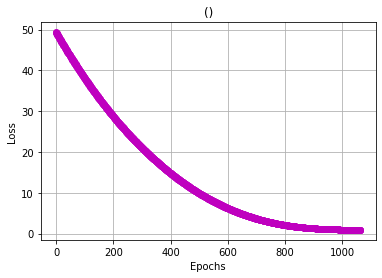

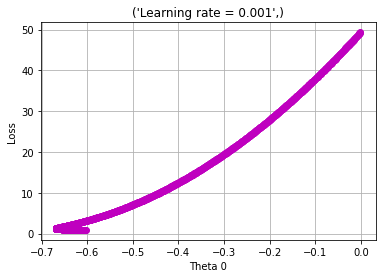

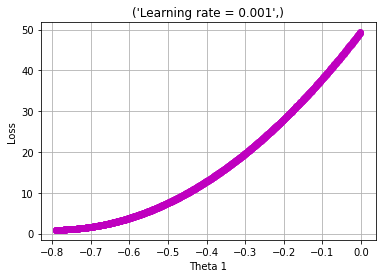

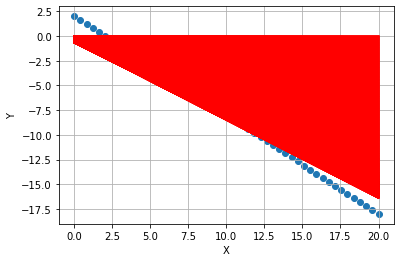

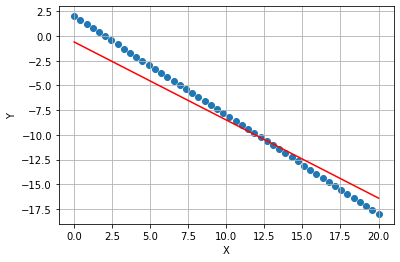

In [64]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.001')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.001')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [65]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adam_SV(X, y, 0.001,0.9,0.5, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
 -0.14912567 -0.00949702  0.13013164  0.26976029  0.40938894  0.5490176
  0.68864625  0.8282749   0.96790356  1.10753221  1.24716086  1.38678952
  1.52641817  1.66604682  1.80567548  1.94530413  2.08493278  2.22456144
  2.36419009  2.50381874  2.6434474   2.78307605  2.9227047   3.06233336
  3.20196201  3.34159066  3.48121932  3.62084797  3.76047662  3.90010528
  4.03973393  4.17936258] 

j = 2.3176689684564185 

d_theta_0 : 0.7584605756619793
d_theta_1 : 19.453041288318968
Gradient Vector:[[ 0.75846058]
 [19.45304129]] 

Gradient Vector Norm: 19.467821598984205 

mo=:0.8636392315716528
mo corrected=:0.8636392315716528
m1=:0.8636392315716528
m1 corrected=:0.8636392315716528
vo=:0.5934730115074904
vo corrected=:0.5934730115074904
v1=:384.48975212236076
v1 corrected=:384.48975212236076
theta_0_new : -0.6635624983104852 

theta_1_new : -0.6589723636373241 

****************** Iteration 645 ********************
h(x):[ -0.6635625   -0.93253

In [66]:
r2_score(y,output[-1])

0.944245878919177

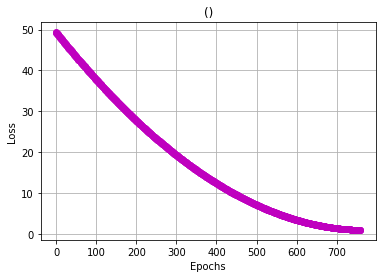

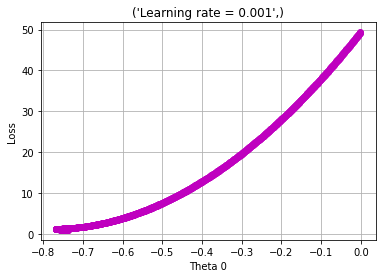

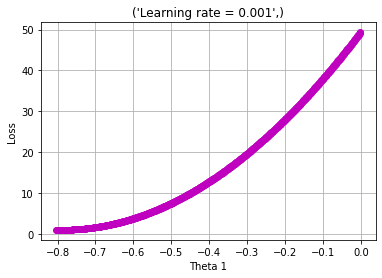

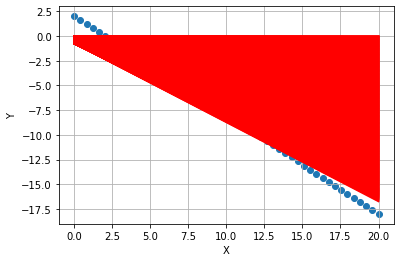

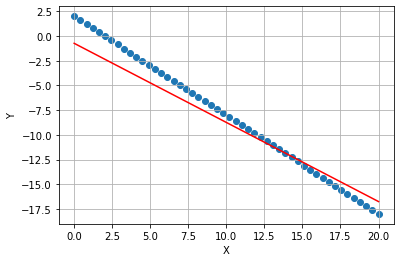

In [68]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.001')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.001')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [69]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adam_SV(X, y, 0.001,0.5,0.99, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
Error Vector: [-2.65668867 -2.55666791 -2.45664714 -2.35662638 -2.25660561 -2.15658485
 -2.05656408 -1.95654332 -1.85652255 -1.75650179 -1.65648102 -1.55646025
 -1.45643949 -1.35641872 -1.25639796 -1.15637719 -1.05635643 -0.95633566
 -0.8563149  -0.75629413 -0.65627337 -0.5562526  -0.45623184 -0.35621107
 -0.25619031 -0.15616954 -0.05614878  0.04387199  0.14389275  0.24391352
  0.34393429  0.44395505  0.54397582  0.64399658  0.74401735  0.84403811
  0.94405888  1.04407964  1.14410041  1.24412117  1.34414194  1.4441627
  1.54418347  1.64420423  1.744225    1.84424576  1.94426653  2.04428729
  2.14430806  2.24432883] 

j = 1.0629375618895012 

d_theta_0 : -0.20617992348109918
d_theta_1 : 6.439965812404819
Gradient Vector:[[-0.20617992]
 [ 6.43996581]] 

Gradient Vector Norm: 6.443265462930231 

mo=:-0.2023906266205801
mo corrected=:-0.2023906266205801
m1=:-0.2023906266205801
m1 corrected=:-0.2023906266205801
vo=:0.5412153241151797
vo cor

In [70]:
r2_score(y,output[-1])

0.949344733641701

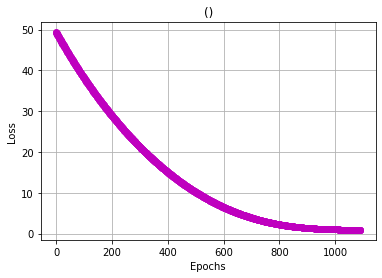

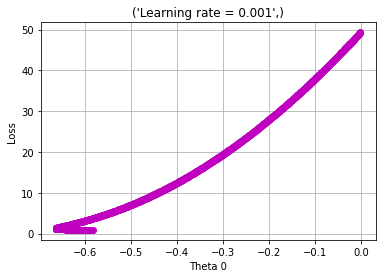

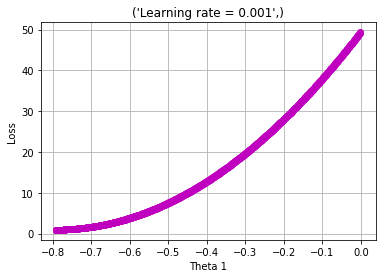

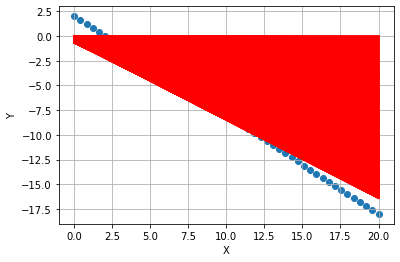

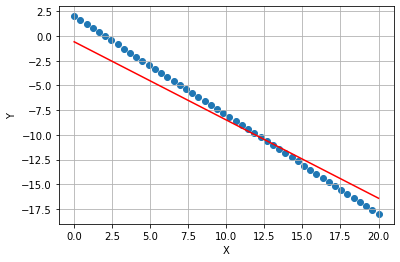

In [71]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.001')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.001')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [72]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adam_SV(X, y, 0.001,0.5,0.5, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.
Error Vector: [-2.68597801 -2.55781149 -2.42964497 -2.30147845 -2.17331193 -2.04514541
 -1.91697888 -1.78881236 -1.66064584 -1.53247932 -1.4043128  -1.27614628
 -1.14797976 -1.01981323 -0.89164671 -0.76348019 -0.63531367 -0.50714715
 -0.37898063 -0.25081411 -0.12264758  0.00551894  0.13368546  0.26185198
  0.3900185   0.51818502  0.64635154  0.77451807  0.90268459  1.03085111
  1.15901763  1.28718415  1.41535067  1.54351719  1.67168372  1.79985024
  1.92801676  2.05618328  2.1843498   2.31251632  2.44068284  2.56884937
  2.69701589  2.82518241  2.95334893  3.08151545  3.20968197  3.33784849
  3.46601502  3.59418154] 

j = 1.8135298875648507 

d_theta_0 : 0.45410176253263423
d_theta_1 : 15.435171945719567
Gradient Vector:[[ 0.45410176]
 [15.43517195]] 

Gradient Vector Norm: 15.441850323217864 

mo=:0.4651004201098102
mo corrected=:0.4651004201098102
m1=:0.4651004201098102
m1 corrected=:0.4651004201098102
vo=:0.21656034328943308
vo corr

In [73]:
r2_score(y,output[-1])

0.9475845101116701

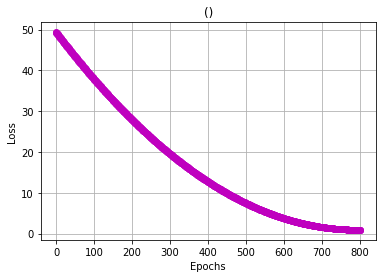

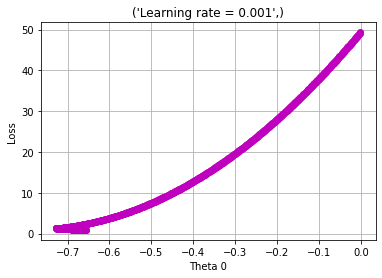

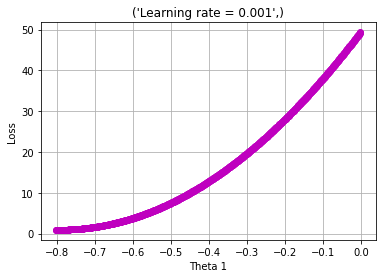

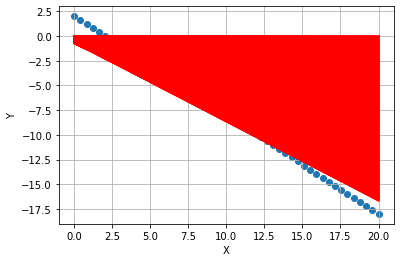

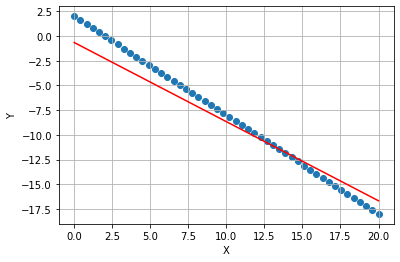

In [75]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.001')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.001')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [76]:
t0,t1,loss,output,t0_optimum,t1_optimum,epochs = Adam_SV(X, y, 0.01,0.9,0.99, 1e-08, 5000)

Streaming output truncated to the last 5000 lines.

mo=:-0.3474689439234044
mo corrected=:-0.3474689439234044
m1=:-0.3474689439234044
m1 corrected=:-0.3474689439234044
vo=:0.4261149764934634
vo corrected=:0.43088953396335294
v1=:57.12693127244509
v1 corrected=:57.76703038063239
theta_0_new : 0.6152592879536954 

theta_1_new : -0.8950264544209541 

****************** Iteration 448 ********************
h(x):[  0.61525929   0.24994237  -0.11537455  -0.48069147  -0.84600839
  -1.21132531  -1.57664223  -1.94195915  -2.30727607  -2.67259299
  -3.03790991  -3.40322683  -3.76854375  -4.13386067  -4.49917759
  -4.86449451  -5.22981143  -5.59512835  -5.96044528  -6.3257622
  -6.69107912  -7.05639604  -7.42171296  -7.78702988  -8.1523468
  -8.51766372  -8.88298064  -9.24829756  -9.61361448  -9.9789314
 -10.34424832 -10.70956524 -11.07488216 -11.44019908 -11.805516
 -12.17083292 -12.53614984 -12.90146676 -13.26678368 -13.6321006
 -13.99741752 -14.36273444 -14.72805136 -15.09336828 -15.4586852
 -15

In [77]:
r2_score(y,output[-1])

0.9952892444628807

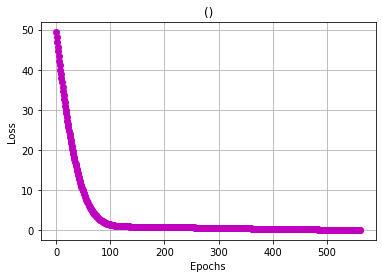

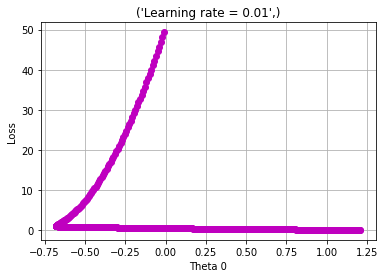

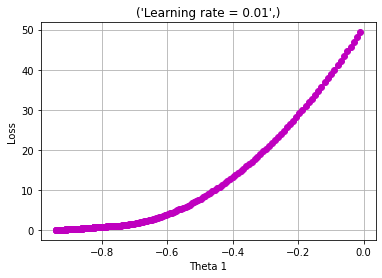

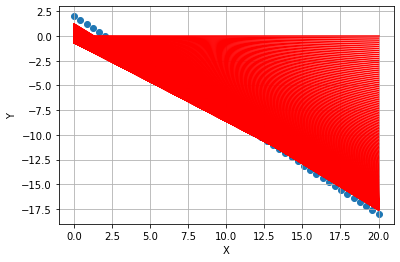

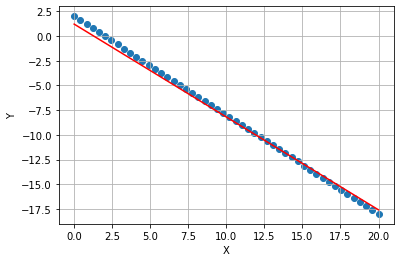

In [78]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.01')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.01')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

## Congratulations 
![image.png](attachment:image.png)